# Statistics Fundamentals Notebook

## 1. Mean, Median, Mode
- Measures of central tendency.
- They summarize a dataset with a single representative value.

In [18]:
import numpy as np
from scipy import stats

data = [1, 2, 2, 3, 4, 5, 5, 5, 6, 7]
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Mode:", stats.mode(data))

Mean: 4.0
Median: 4.5
Mode: ModeResult(mode=5, count=3)


## 2. Variance & Standard Deviation
- Variance measures the average squared deviation from the mean.
- Standard deviation is the square root of variance.

In [2]:
print("Variance:", np.var(data))
print("Standard Deviation:", np.std(data))

Variance: 3.4
Standard Deviation: 1.8439088914585775


## 3. Probability
- Probability is the measure of likelihood of an event.

In [3]:
outcomes = ['H', 'T']
probability_H = outcomes.count('H') / len(outcomes)
print("P(H):", probability_H)

P(H): 0.5


## 4. Distributions (Normal)
- Normal distribution is a bell-shaped curve.
- Used widely in modeling natural phenomena.

Matplotlib is building the font cache; this may take a moment.


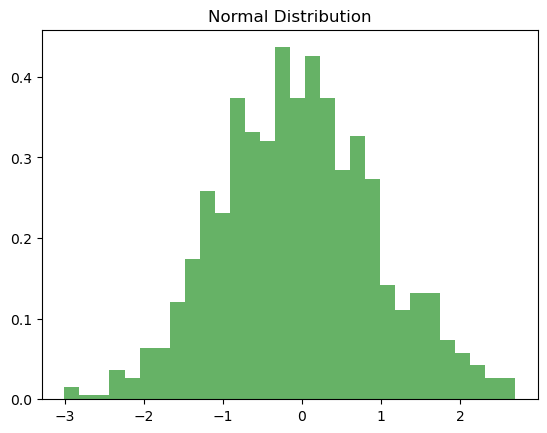

In [4]:
import matplotlib.pyplot as plt

x = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(x, bins=30, density=True, alpha=0.6, color='g')
plt.title("Normal Distribution")
plt.show()

## 5. Skewness & Kurtosis
- Skewness measures asymmetry.
- Kurtosis measures tail heaviness of distribution.

In [5]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(data))
print("Kurtosis:", kurtosis(data))

Skewness: -0.09570461374352479
Kurtosis: -1.14878892733564


## 6. Correlation & Covariance
- Correlation shows linear relationship (-1 to 1).
- Covariance indicates how two variables vary together.

In [6]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

print("Correlation:", np.corrcoef(x, y)[0, 1])
print("Covariance:", np.cov(x, y)[0, 1])

Correlation: -0.9999999999999999
Covariance: -2.5


## 7. Z-score & Standardization
- Z-score tells how far a value is from the mean in std deviations.
- Standardization rescales to mean 0 and std 1.

In [7]:
from scipy.stats import zscore

data_z = zscore(data)
print("Z-scores:", data_z)

Z-scores: [-1.62697843 -1.08465229 -1.08465229 -0.54232614  0.          0.54232614
  0.54232614  0.54232614  1.08465229  1.62697843]


## 8. Confidence Intervals
- Estimates the range for a population parameter.
- Given a confidence level (like 95%).

In [8]:
import statsmodels.stats.api as sms

ci = sms.DescrStatsW(data).tconfint_mean()
print("Confidence Interval:", ci)

Confidence Interval: (2.6095960978455395, 5.3904039021544605)


## 9. Hypothesis Testing (t-test)
- Used to infer about a population from a sample.
- Checks if sample mean is statistically different.

In [9]:
from scipy.stats import ttest_1samp

t_stat, p_val = ttest_1samp(data, popmean=4)
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: 0.0 p-value: 1.0


## 10. Bayes’ Theorem
- Updates probabilities with new evidence.
- Core idea in probabilistic ML models.

In [10]:
# P(A|B) = P(B|A) * P(A) / P(B)
P_A = 0.3
P_B_given_A = 0.7
P_B = 0.6

P_A_given_B = (P_B_given_A * P_A) / P_B
print("P(A|B):", P_A_given_B)

P(A|B): 0.35


## 11. Outliers & IQR
- Outliers can distort models.
- IQR is used to detect outliers (Q3 - Q1).

In [19]:
import numpy as np

# Generate data with outliers
np.random.seed(42)
data = np.random.normal(loc=50, scale=5, size=100).tolist()
data += [100, 105, 110]  # Add outliers

# IQR method
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = [x for x in data if x < lower or x > upper]
print("Outliers:", outliers)

Outliers: [36.901274479551276, 100, 105, 110]


#Hypothesis testing

Null Hypothesis (H₀): There is no difference in the average tip amount between 
males and females.

Alternative Hypothesis (H₁): There is a difference in the average tip amount 
between males and females.

### 🔍 Key Concepts Explained

| **Concept**             | **Description** |
|-------------------------|-----------------|
| **Null Hypothesis (H₀)** | A default assumption — here, that gender has no effect on tip amount. |
| **Alternative Hypothesis (H₁)** | The hypothesis that there *is* a difference between groups. |
| **T-test**              | A statistical test used to compare the means of two groups. |
| **P-value**             | Probability of observing the data assuming H₀ is true. A small p-value (e.g., < 0.05) indicates strong evidence against H₀. |
| **Alpha (α)**           | The significance level — a threshold (commonly 0.05) to decide whether to reject H₀. |
| **T-statistic**         | A value that measures how many standard deviations the sample mean is from the population mean. |

In [20]:
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
tips = sns.load_dataset('tips')

# Separate the data based on gender
male_tips = tips[tips['sex'] == 'Male']['tip']
female_tips = tips[tips['sex'] == 'Female']['tip']

# Perform an independent t-test
t_stat, p_value = ttest_ind(male_tips, female_tips)

# Show results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There IS a significant difference in tips between males and females.")
else:
    print("Fail to reject the null hypothesis: There is NO significant difference in tips between males and females.")

T-statistic: 1.388
P-value: 0.166
Fail to reject the null hypothesis: There is NO significant difference in tips between males and females.


In [22]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
